In [1]:
# # SQL데이터 가져오기
# con = m.connect(host='localhost', user='root', password='7751', db ='DB_FROM_PYTHON', charset='utf8')
# cur = con.cursor()
# q = "SELECT * FROM table_from_pythom"
# cur.execute(q)                        # 명령은 했으나 불러올 곳이 없음.
# res = cur.fetchall()                  # .fetchall을 사용해 명령 데이터를 받아옴
# for data in res:                      # 반복문을 통해 출력
#      print(data)
#  con.close()

In [2]:
import pymysql as m
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
# 1. 아나콘다 cmd 관리자 권한으로 실행
# 2. conda install pymysql
# 3. 주피터 노트북 실행 
# 4. SQL SHOW databases; 확인 가능

In [3]:
con = m.connect(host='localhost', user='root', password='7751', charset='utf8')
cur = con.cursor() # 커서...

In [4]:
# 1) 데이터 기간내 국가별 방문자수(19.1~20.4)

con = m.connect(host='localhost', user='root', password='7751', db ='visitor_of_korea', charset='utf8')
cur = con.cursor()
q = """SELECT 국가, SUM(방문자_수) '국가별 방문자 수'
 FROM project_csv
GROUP BY 1
ORDER BY 2 DESC"""
cur.execute(q)                        
res = cur.fetchall()                  
df1 = pd.DataFrame(res)
con.close()
df1

,0,1
0,China,6236504
1,Japan,3695581
2,Taiwan,1424629
3,USA,1170719
4,Hong Kong,783159
5,Thailand,644523
6,Vietnam,624921
7,Phillipines,560570
8,Malaysia,455722
9,Russia,400628


In [5]:
col = ['국가', '방문자 수']
df1 = pd.DataFrame(res, columns =col)
df1

,국가,방문자 수
0,China,6236504
1,Japan,3695581
2,Taiwan,1424629
3,USA,1170719
4,Hong Kong,783159
5,Thailand,644523
6,Vietnam,624921
7,Phillipines,560570
8,Malaysia,455722
9,Russia,400628


In [6]:
# df1.to_csv("nation_viitor.csv.csv")

In [7]:
# 1-1) TOP 5 전체 방문자 수 대비 비율


con = m.connect(host='localhost', user='root', password='7751', db ='visitor_of_korea', charset='utf8')
cur = con.cursor()
q = """SELECT 국가, SUM(방문자_수) / (SELECT SUM(방문자_수) FROM project_csv)*100 '나라별 비율'
FROM project_csv
WHERE 국가 IN ('china','Japan','Taiwan','USA','Hong Kong')
GROUP BY 1
ORDER BY 2 DESC
"""
cur.execute(q)                        
res = cur.fetchall()                  
df2 = pd.DataFrame(res)
con.close()
df2

col = ['국가', '방문자 비율']
df2 = pd.DataFrame(res, columns =col)
df2

,국가,방문자 비율
0,China,32.5144
1,Japan,19.2671
2,Taiwan,7.4274
3,USA,6.1036
4,Hong Kong,4.0830


In [8]:
# df2.to_csv("TOP5_nation_visitor_ratio.csv.csv")

In [9]:
# 2) TOP 5 국가 방문 목적 비율


con = m.connect(host='localhost', user='root', password='7751', db ='visitor_of_korea', charset='utf8')
cur = con.cursor()
q = """SELECT 국가, 
SUM(관광)/SUM(방문자_수)*100 관광,
SUM(사업)/SUM(방문자_수)*100 사업,
SUM(공무)/SUM(방문자_수)*100 공무,
SUM(유학)/SUM(방문자_수)*100 유학
FROM project_csv
WHERE 국가 IN ('china','Japan','Taiwan','USA','Hong Kong')
GROUP BY 1
ORDER BY 2 DESC, 3 DESC, 4 DESC, 5 DESC
"""
cur.execute(q)                        
res = cur.fetchall()                  
df3 = pd.DataFrame(res)
con.close()
df3

col = ['국가', '관광', '사업', '공무', '유학']
df3 = pd.DataFrame(res, columns =col)
df3

,국가,관광,사업,공무,유학
0,Taiwan,98.2479,0.0810,0.0155,0.3974
1,Hong Kong,97.8488,0.0977,0.0066,0.4196
2,Japan,97.0299,0.7629,0.0613,0.4420
3,China,80.5216,0.7170,0.0790,4.3149
4,USA,75.6001,0.4654,3.5476,0.5463


In [10]:
# df3.to_csv("TOP5_nation_purpose_ratio.csv.csv")

In [11]:
# 관광 비중이 높아 방문 목적별 TOP5 국가를 선정함
# 3) 관광 목적 TOP 5 / 1. 중국 2. 일본 3. 대만 4. 미국 5. 홍콩

con = m.connect(host='localhost', user='root', password='7751', db ='visitor_of_korea', charset='utf8')
cur = con.cursor()
q = """SELECT 국가, SUM(관광)/(SELECT SUM(관광) FROM project_csv)*100 관광비율
FROM project_csv
WHERE 국가 IN ('China', 'Japan', 'Taiwan', 'USA', 'Hong Kong')
GROUP BY 1
ORDER BY 2 DESC
"""
cur.execute(q)                        
res = cur.fetchall()                  
df4 = pd.DataFrame(res)
con.close()
df4

col = ['국가', '관광 비율']
df4 = pd.DataFrame(res, columns =col)
df4

,국가,관광 비율
0,China,32.0197
1,Japan,22.8640
2,Taiwan,8.9246
3,USA,5.6434
4,Hong Kong,4.8862


In [12]:
# df4.to_csv("tour_TOP5.csv.csv")

In [13]:
# 사업 목적 TOP 5 / 1. 중국 2. 인도 3. 일본 4. 베트남 5. 아프리카 대륙

con = m.connect(host='localhost', user='root', password='7751', db ='visitor_of_korea', charset='utf8')
cur = con.cursor()
q = """SELECT 국가, SUM(사업)/(SELECT SUM(사업) FROM project_csv)*100 사업비율
FROM project_csv
WHERE 국가 IN ('China', 'India', 'Japan', 'Vietnam', 'Africa others')
GROUP BY 1
ORDER BY 2 DESC
"""
cur.execute(q)                        
res = cur.fetchall()                  
df5 = pd.DataFrame(res)
con.close()
df5

col = ['국가', '사업 비율']
df5 = pd.DataFrame(res, columns =col)
df5

,국가,사업 비율
0,China,22.6964
1,India,19.0170
2,Japan,14.3104
3,Vietnam,7.2481
4,Africa others,5.3726


In [14]:
# df5.to_csv("5.business_TOP5.csv.csv")

In [15]:
# 공무 목적 TOP 5 / 1. 미국 2. 중국 3. 몽골 4. 베트남 5. 태국 

con = m.connect(host='localhost', user='root', password='7751', db ='visitor_of_korea', charset='utf8')
cur = con.cursor()
q = """SELECT 국가, SUM(공무)/(SELECT SUM(공무) FROM project_csv)*100 공무비율
FROM project_csv
WHERE 국가 IN ('USA', 'China', 'Vietnam', 'Mongolia', 'Thailand')
GROUP BY 1
ORDER BY 2 DESC
"""
cur.execute(q)                        
res = cur.fetchall()                  
df6 = pd.DataFrame(res)
con.close()
df6

col = ['국가', '공무 비율']
df6 = pd.DataFrame(res, columns =col)
df6

,국가,공무 비율
0,USA,49.2453
1,China,5.8443
2,Mongolia,5.2467
3,Vietnam,5.1957
4,Thailand,4.9669


In [16]:
# df6.to_csv("6.government_affairs_TOP5.csv.csv")

In [17]:
# 유학 목적 TOP 5 / 1. 중국 2. 베트남 3. 일본 4. 몽골 5.우즈벡 

con = m.connect(host='localhost', user='root', password='7751', db ='visitor_of_korea', charset='utf8')
cur = con.cursor()
q = """SELECT 국가, SUM(유학)/(SELECT SUM(유학) FROM project_csv)*100 공무비율
FROM project_csv
WHERE 국가 IN ('China', 'Vietnam', 'Japan', 'Mongolia', 'Uzbekistan')
GROUP BY 1
ORDER BY 2 DESC
"""
cur.execute(q)                        
res = cur.fetchall()                  
df7 = pd.DataFrame(res)
con.close()
df7

col = ['국가', '유학 비율']
df7 = pd.DataFrame(res, columns =col)
df7

,국가,유학 비율
0,China,59.6831
1,Vietnam,14.4862
2,Japan,3.6224
3,Mongolia,2.3685
4,Uzbekistan,1.9759


In [18]:
# df7.to_csv("7.studying_overseas_TOP5.csv")

In [29]:
df_perp = pd.read_csv('C:/workspace/R/2.Python/PROJECT/Enter_korea_by_purpose.csv', delimiter=',')
df_perp.sort_values('growth').head(5)

,date,nation,visitor,growth,share,tourism,business,official affairs,studying,others
904,2020-4,Macao,1,-99.976798,0.003400,1,0,0,0,0
903,2020-4,Hong Kong,35,-99.954010,0.118987,17,2,0,8,8
913,2020-4,Uzbekistan,7,-99.905123,0.023797,1,0,0,1,5
901,2020-4,Japan,360,-99.875901,1.223865,58,53,2,49,198
902,2020-4,Taiwan,155,-99.862919,0.526942,48,8,0,12,87


In [32]:
df_2019 = df_perp[df_perp['date'].str.startswith('2019')]
df_2019.sort_values('growth', ascending=False).head(5)

,date,nation,visitor,growth,share,tourism,business,official affairs,studying,others
315,2019-6,*GCC,4736,82.504817,0.320820,4318,42,12,112,252
498,2019-9,Cambodia,3629,82.453494,0.248619,1794,49,170,32,1584
623,2019-11,Iran,402,75.545852,0.027602,279,49,4,26,44
68,2019-2,Vietnam,42181,72.111147,3.509813,20071,806,98,9324,11882
429,2019-8,India,17001,60.235627,1.071740,3870,2850,114,341,9826


In [33]:
df_2019.sort_values('growth').head(5)

,date,nation,visitor,growth,share,tourism,business,official affairs,studying,others
719,2019-12,Overseas Korean,5281,-71.966238,0.362485,0,0,0,0,5281
99,2019-2,Norway,577,-67.290249,0.048011,455,38,3,45,36
23,2019-1,Iran,184,-66.787004,0.016655,60,45,10,23,46
102,2019-2,Swiss,877,-63.443101,0.072974,710,17,0,67,83
263,2019-5,Iran,271,-62.413315,0.018241,146,62,5,13,45


In [22]:
df_full = pd.read_csv('C:/workspace/R/2.Python/PROJECT/Enter_korea_by_full.csv', delimiter=',')
df_full

,visitor,tourism,business,official affairs,studying,others,age0-20,age21-30,age31-40,age41-50,age51-60,age61
0,392814,320113,2993,138,8793,60777,36520,108591,103657,48574,40893,40998
1,206526,198805,2233,127,785,4576,18015,57921,34165,39811,33857,20330
2,87954,86393,74,22,180,1285,18888,17927,18595,18862,8169,4566
3,35896,34653,59,2,90,1092,3890,11384,7400,5461,4629,2137
4,2570,2506,2,0,17,45,223,1013,762,264,181,92
...,...,...,...,...,...,...,...,...,...,...,...,...
955,13,0,0,0,0,13,0,0,0,0,0,0
956,22,2,0,0,0,20,0,1,4,0,0,0
957,177,11,5,0,11,150,3,9,16,6,2,0
958,3,0,0,0,0,3,0,0,0,0,0,0


In [23]:
df_full.columns = ['방문자 수','관광','사업', '공무', '유학', '기타' ,'20대 미만', '20대', '30대', '40대', '50대', '60대 이상']

In [24]:
df_full

,방문자 수,관광,사업,공무,유학,기타,20대 미만,20대,30대,40대,50대,60대 이상
0,392814,320113,2993,138,8793,60777,36520,108591,103657,48574,40893,40998
1,206526,198805,2233,127,785,4576,18015,57921,34165,39811,33857,20330
2,87954,86393,74,22,180,1285,18888,17927,18595,18862,8169,4566
3,35896,34653,59,2,90,1092,3890,11384,7400,5461,4629,2137
4,2570,2506,2,0,17,45,223,1013,762,264,181,92
...,...,...,...,...,...,...,...,...,...,...,...,...
955,13,0,0,0,0,13,0,0,0,0,0,0
956,22,2,0,0,0,20,0,1,4,0,0,0
957,177,11,5,0,11,150,3,9,16,6,2,0
958,3,0,0,0,0,3,0,0,0,0,0,0


In [27]:
df_cor = df_full.corr()
df_cor

,방문자 수,관광,사업,공무,유학,기타,20대 미만,20대,30대,40대,50대,60대 이상
방문자 수,1.000000,0.994248,0.768332,0.240117,0.723726,0.837460,0.821915,0.992168,0.973318,0.986808,0.983800,0.972752
관광,0.994248,1.000000,0.751901,0.221326,0.665299,0.776055,0.839858,0.986733,0.952921,0.992988,0.987014,0.969380
사업,0.768332,0.751901,1.000000,0.169479,0.594427,0.683281,0.573158,0.774031,0.759417,0.744051,0.748742,0.742042
공무,0.240117,0.221326,0.169479,1.000000,0.100111,0.299829,0.243167,0.182636,0.195462,0.242553,0.279354,0.301198
유학,0.723726,0.665299,0.594427,0.100111,1.000000,0.813417,0.524113,0.740253,0.774579,0.666181,0.659986,0.657573
기타,0.837460,0.776055,0.683281,0.299829,0.813417,1.000000,0.564160,0.823759,0.890843,0.764559,0.780761,0.812084
20대 미만,0.821915,0.839858,0.573158,0.243167,0.524113,0.564160,1.000000,0.792876,0.715002,0.854018,0.794558,0.735115
20대,0.992168,0.986733,0.774031,0.182636,0.740253,0.823759,0.792876,1.000000,0.969840,0.972462,0.973824,0.958264
30대,0.973318,0.952921,0.759417,0.195462,0.774579,0.890843,0.715002,0.969840,1.000000,0.932610,0.935163,0.947689
40대,0.986808,0.992988,0.744051,0.242553,0.666181,0.764559,0.854018,0.972462,0.932610,1.000000,0.989132,0.962734


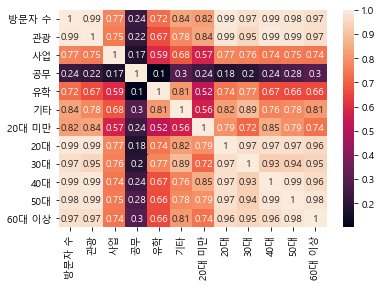

In [26]:
plt.rc("font",family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)
sn.heatmap(df_cor, annot=True) # 그래프에 수치가 나타남
plt.show()

In [ ]:
df_2019.sort_values('growth').head(5)